In [1]:
import cv2 
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
import absl
import logging
import warnings

In [3]:
import os
logging.captureWarnings(True)
absl_logger = logging.getLogger('absl')
absl_logger.setLevel(logging.ERROR)
warnings.filterwarnings("ignore",module='absl')
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [4]:
image_paths = sorted(glob.glob(r"C:\Users\dhika\Downloads\camvid_images\camvid_images" + os.sep + "*.png"))

for idx in range(len(image_paths)):
    print(image_paths[idx])

C:\Users\dhika\Downloads\camvid_images\camvid_images\camvid_sample_1.png
C:\Users\dhika\Downloads\camvid_images\camvid_images\camvid_sample_2.png
C:\Users\dhika\Downloads\camvid_images\camvid_images\camvid_sample_3.png
C:\Users\dhika\Downloads\camvid_images\camvid_images\camvid_sample_4.png


In [5]:
def image_load(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = np.expand_dims(image,axis=0)/255
    return image

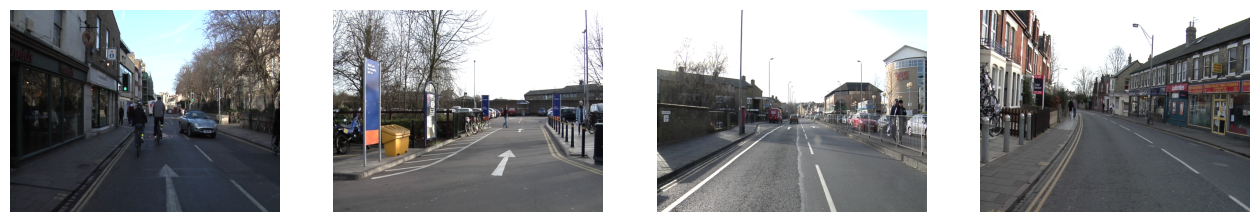

In [6]:
images = []
figures, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 20))

for idx, axis in enumerate(ax.flat):
    image = image_load(image_paths[idx])
    images.append(image)
    axis.imshow(image[0])
    axis.axis("off")

In [7]:
class_index = \
    {
         0: [(64, 128, 64),  'Animal'],
         1: [(192, 0, 128),  'Archway'],
         2: [(0, 128, 192),  'Bicyclist'],
         3: [(0, 128, 64),   'Bridge'],
         4: [(128, 0, 0),    'Building'],
         5: [(64, 0, 128),   'Car'],
         6: [(64, 0, 192),   'Cart/Luggage/Pram'],
         7: [(192, 128, 64), 'Child'],
         8: [(192, 192, 128),'Column Pole'],
         9: [(64, 64, 128),  'Fence'],
        10: [(128, 0, 192),  'LaneMkgs Driv'],
        11: [(192, 0, 64),   'LaneMkgs NonDriv'],
        12: [(128, 128, 64), 'Misc Text'],
        13: [(192, 0, 192),  'Motorcycle/Scooter'],
        14: [(128, 64, 64),  'Other Moving'],
        15: [(64, 192, 128), 'Parking Block'],
        16: [(64, 64, 0),    'Pedestrian'],
        17: [(128, 64, 128), 'Road'],
        18: [(128, 128, 192),'Road Shoulder'],
        19: [(0, 0, 192),    'Sidewalk'],
        20: [(192, 128, 128),'Sign Symbol'],
        21: [(128, 128, 128),'Sky'],
        22: [(64, 128, 192), 'SUV/Pickup/Truck'],
        23: [(0, 0, 64),     'Traffic Cone'],
        24: [(0, 64, 64),    'Traffic Light'],
        25: [(192, 64, 128), 'Train'],
        26: [(128, 128, 0),  'Tree'],
        27: [(192, 128, 192),'Truck/Bus'],
        28: [(64, 0, 64),    'Tunnel'],
        29: [(192, 192, 0),  'Vegetation Misc'],
        30: [(0, 0, 0),      'Void'],
        31: [(64, 192, 0),   'Wall']
    }

In [8]:
import tensorflow as tf
import tensorflow_hub as hub

url_model = "https://tfhub.dev/google/HRNet/camvid-hrnetv2-w48/1"
model_seg = hub.load(url_model)

In [9]:
mask_pred = model_seg.predict(images[0])
print(mask_pred.shape)

(1, 720, 960, 33)


In [10]:
mask_pred = mask_pred.numpy()
mask_pred = mask_pred[:,:,:,1:]
mask_pred = np.squeeze(mask_pred)
print(mask_pred.shape)

(720, 960, 32)


(-0.5, 959.5, 719.5, -0.5)

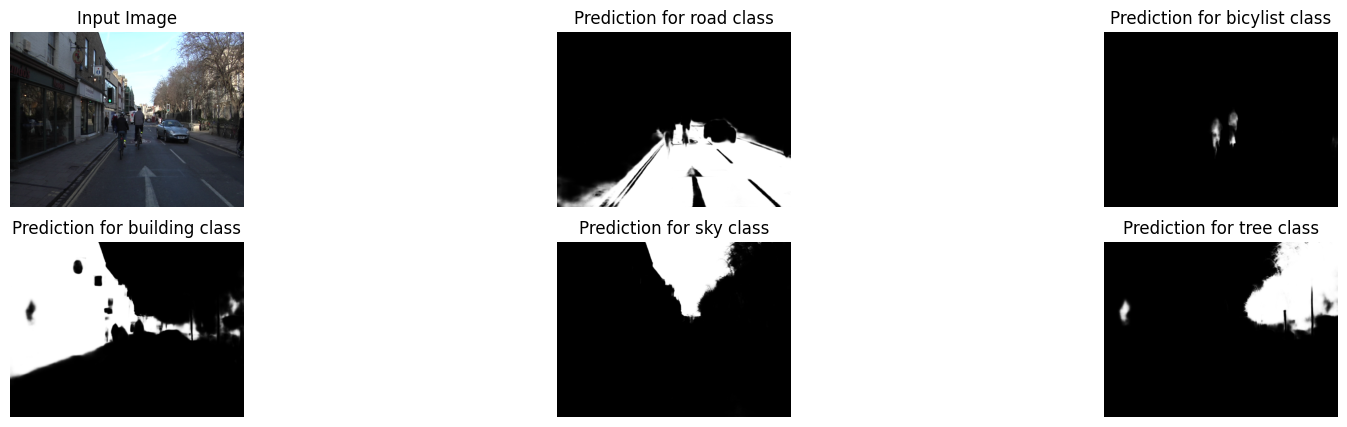

In [11]:
plt.figure(figsize=[20,5])
plt.subplot(2,3,1)
plt.axis('off')
plt.title("Input Image")
plt.imshow(np.squeeze(images[0]))

plt.subplot(2,3,2)
plt.title("Prediction for road class")
plt.imshow(mask_pred[:,:,17], cmap='gray')
plt.axis('off')

plt.subplot(2,3,3)
plt.title("Prediction for bicylist class")
plt.imshow(mask_pred[:,:,2], cmap='gray')
plt.axis('off')

plt.subplot(2,3,4)
plt.title("Prediction for building class")
plt.imshow(mask_pred[:,:,4], cmap='gray')
plt.axis('off')

plt.subplot(2,3,5)
plt.title("Prediction for sky class")
plt.imshow(mask_pred[:,:,21], cmap='gray')
plt.axis('off')

plt.subplot(2,3,6)
plt.title("Prediction for tree class")
plt.imshow(mask_pred[:,:,26], cmap='gray')
plt.axis('off')

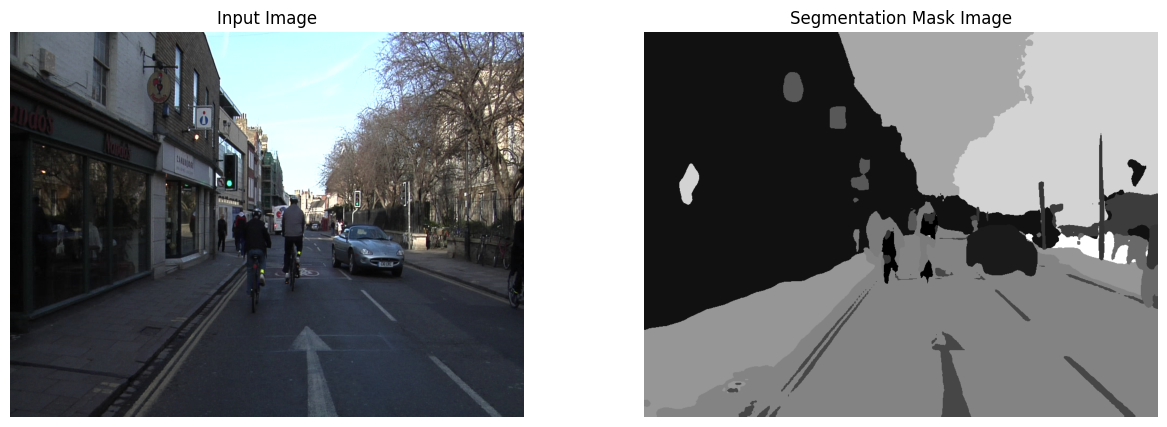

In [12]:
pred_mask_class = np.argmax(mask_pred,axis=-1)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.axis('off')
plt.title("Input Image")
plt.imshow(np.squeeze(images[0]))

plt.subplot(1,2,2)
plt.axis('off')
plt.title("Segmentation Mask Image")
plt.imshow(pred_mask_class,cmap='gray')

In [13]:
print(pred_mask_class[200,450:650])
listed_class = pred_mask_class[200,450:650]
indexed_class = set(listed_class)
indexed_class = [class_index[i][1] for i in indexed_class]
print('detected class index:',','.join(indexed_class))

[ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26]
detected class index: Tree,Building,Sky


In [14]:
def class_to_rgb(class_mask, class_index):
    r_map = np.zeros_like(class_mask).astype(np.uint8)
    g_map = np.zeros_like(class_mask).astype(np.uint8)
    b_map = np.zeros_like(class_mask).astype(np.uint8)
    for class_id in range(len(class_index)):
        index=class_mask==class_id
        r_map[index] = class_index[class_id][0][0]
        g_map[index] = class_index[class_id][0][1]
        b_map[index] = class_index[class_id][0][2]
    set_map_rgb = np.stack([r_map,g_map,b_map],axis=2)
    return set_map_rgb

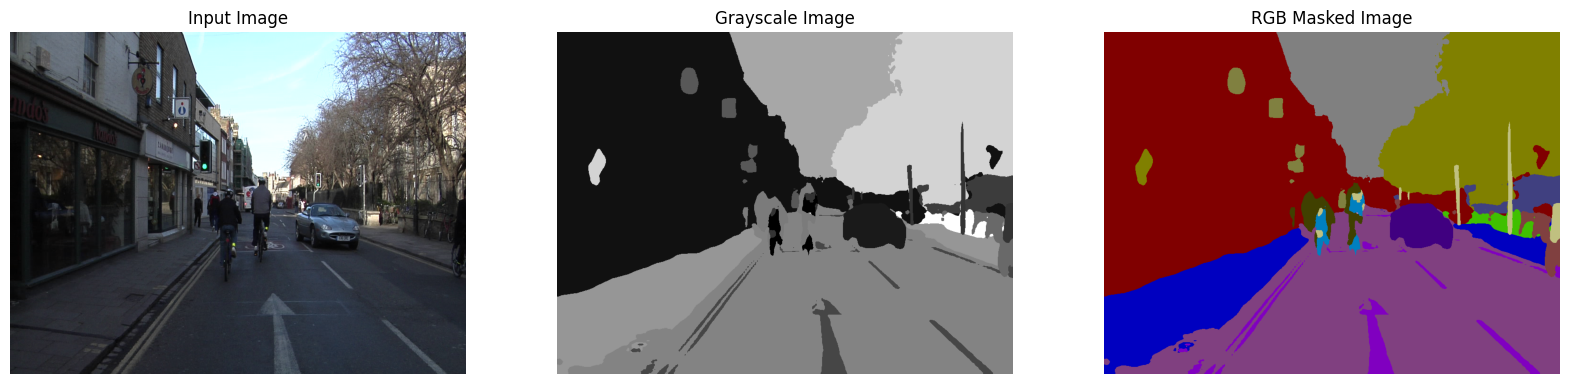

In [15]:
pred_mask_rgb = class_to_rgb(pred_mask_class,class_index)
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Input Image')
plt.imshow(np.squeeze(images[0]))

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Grayscale Image')
plt.imshow(pred_mask_class,cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
plt.title('RGB Masked Image')
plt.imshow(pred_mask_rgb,cmap='gray')

In [16]:
def image_overlay(image,set_map_rgb):
    beta=0.6
    alpha=1.0
    gamma=0.0

    image=(image*255.0).astype(np.uint8) 
    set_map_rgb=cv2.cvtColor(set_map_rgb,cv2.COLOR_RGB2BGR)

    image=cv2.addWeighted(image,alpha,set_map_rgb,beta,gamma)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

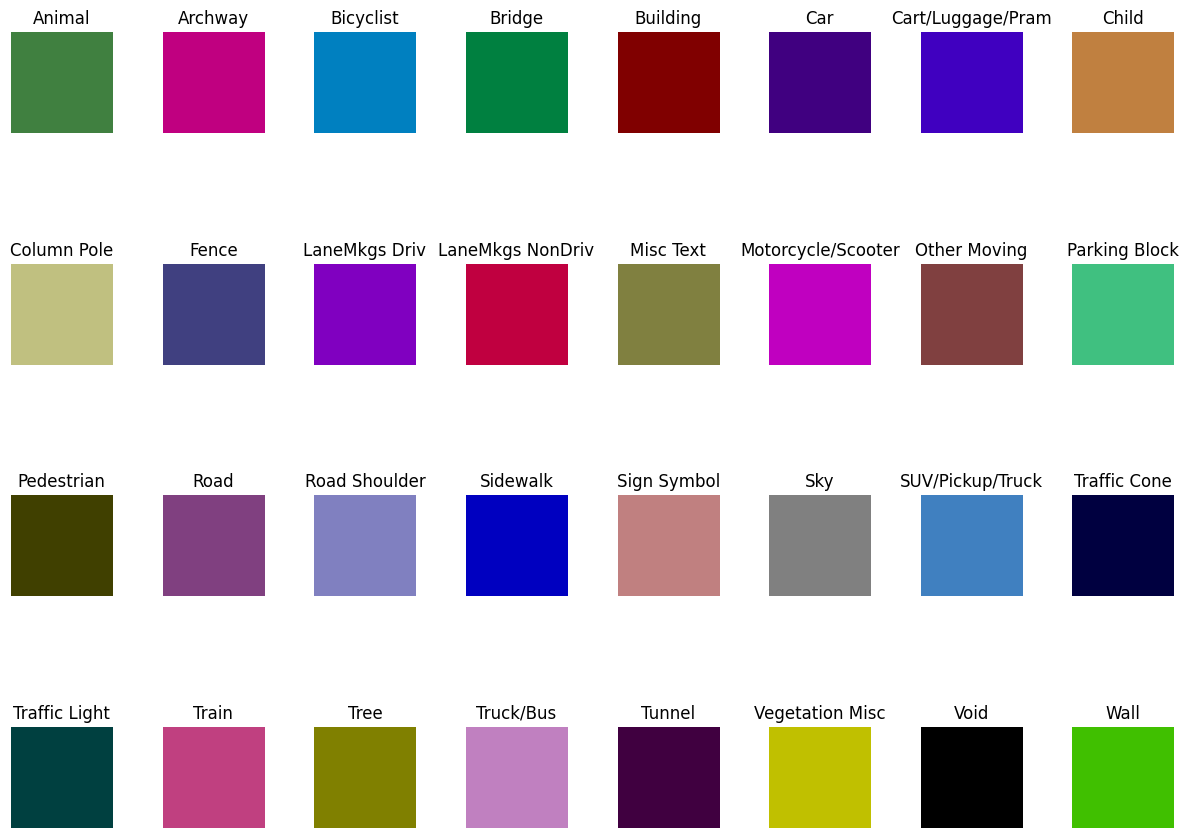

In [17]:
def class_color(class_index):
    array_color = np.array ([[v[0][0],v[0][1],v[0][2]] for v in class_index.values()]).astype(np.uint8)
    labels_class = [val[1] for val in class_index.values()]

    fig,ax = plt.subplots(nrows=4,ncols=8,figsize=(15,12))
    plt.subplots_adjust(wspace=0.5,hspace=0.01)

    for i, axis in enumerate(ax.flat):
        axis.imshow(array_color[i][None,None,:])
        axis.set_title(labels_class[i])
        axis.axis('off')
class_color(class_index)

In [18]:
def inference_run(images,model):
    for img in images:
        pred_mask = model.predict(img).numpy()
        pred_mask = pred_mask[:,:,:,1:]
        pred_mask = np.squeeze(pred_mask)
        pred_mask_class = np.argmax(pred_mask,axis=-1)
        pred_mask_rgb = class_to_rgb(pred_mask_class,class_index)
        
        fig=plt.figure(figsize=[20,20])
        ax1=fig.add_subplot(1,4,1)
        ax1.imshow(img[0])
        ax1.set_title('Input Image')
        plt.axis('off')
        
        ax2=fig.add_subplot(1,4,2)
        ax2.set_title('Predicted Mask')
        ax2.imshow(pred_mask_class,cmap='gray')
        plt.axis('off')

        ax3=fig.add_subplot(1,4,3)
        ax3.set_title('Predicted RGB')
        ax3.imshow(pred_mask_rgb)
        plt.axis('off')

        image_overlayed = image_overlay(img[0],pred_mask_rgb)
        ax4=fig.add_subplot(1,4,4)
        ax4.set_title('Overlayed Image')
        ax4.imshow(image_overlayed)
        plt.axis('off')

        plt.show()

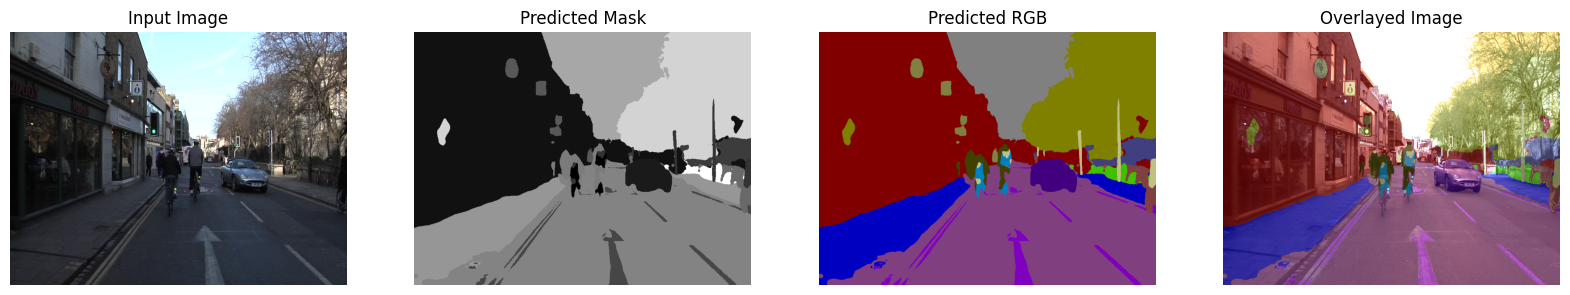

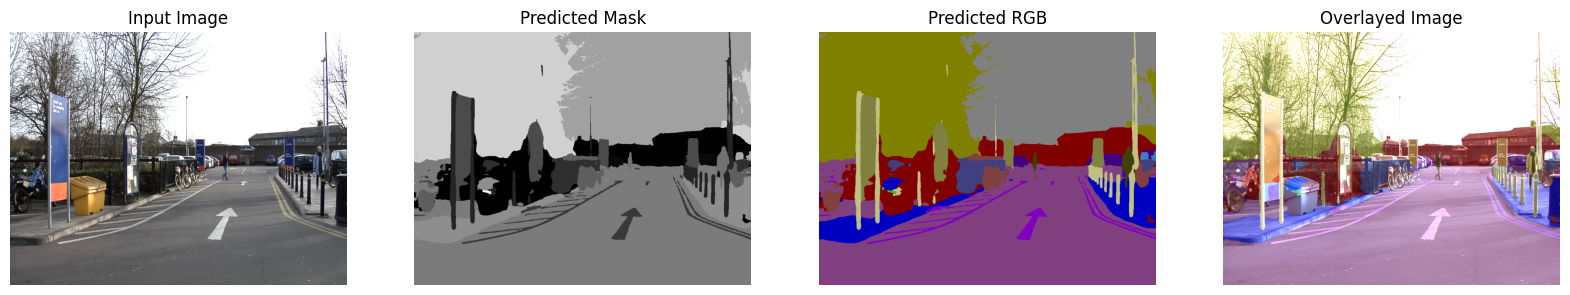

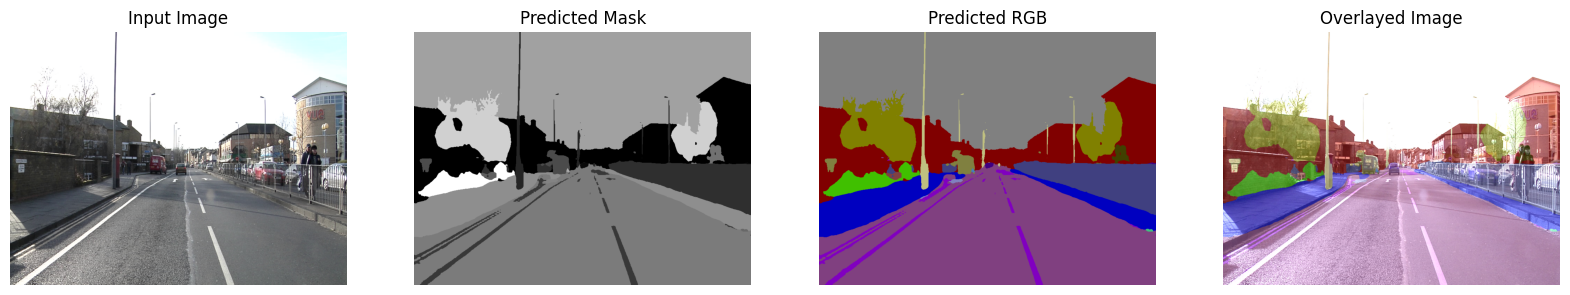

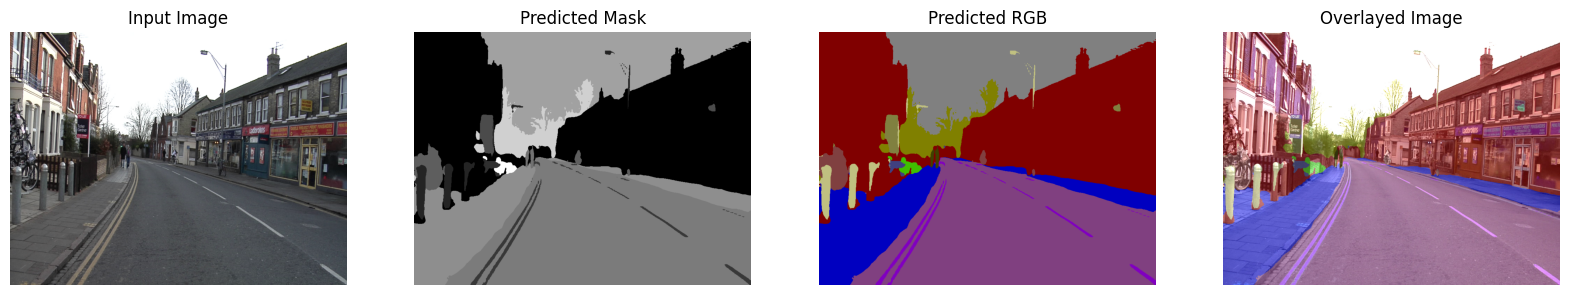

In [19]:
inference_run(images,model_seg)

In [20]:
def inference_run(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = img / 255.0

    pred_mask = model.predict(np.expand_dims(img, 0)).numpy()
    pred_mask = pred_mask[:,:,:,1:]
    pred_mask = np.squeeze(pred_mask)
    pred_mask_class = np.argmax(pred_mask,axis=-1)
    pred_mask_rgb = class_to_rgb(pred_mask_class,class_index)

    
    listed_class = pred_mask_class.flatten()
    indexed_class = set(listed_class)
    indexed_class = [class_index[i][1] for i in indexed_class]
    print('detected class index:', ','.join(indexed_class))
    print('total subjects detected:',len(indexed_class))

    fig=plt.figure(figsize=[20,20])
    ax1=fig.add_subplot(1,4,1)
    ax1.imshow(img)
    ax1.set_title('Input Image')
    plt.axis('off')

    ax2=fig.add_subplot(1,4,2)
    ax2.set_title('Predicted Mask')
    ax2.imshow(pred_mask_class,cmap='gray')
    plt.axis('off')

    ax3=fig.add_subplot(1,4,3)
    ax3.set_title('Predicted RGB')
    ax3.imshow(pred_mask_rgb)
    plt.axis('off')

    image_overlayed = image_overlay(img,pred_mask_rgb)
    ax4=fig.add_subplot(1,4,4)
    ax4.set_title('Overlayed Image')
    ax4.imshow(image_overlayed)
    plt.axis('off')

    fig_legend, ax_legend = plt.subplots(nrows=4,ncols=8,figsize=(15,12))
    plt.subplots_adjust(wspace=0.5,hspace=0.01)
    array_color = np.array([[v[0][0],v[0][1],v[0][2]] for v in class_index.values()]).astype(np.uint8)
    labels_class = [val[1] for val in class_index.values()]
    for i, axis in enumerate(ax_legend.flat):
        axis.imshow(array_color[i][None,None,:])
        axis.set_title(labels_class[i])
        axis.axis('off')

    plt.show()

detected class index: Building,Car,Column Pole,Fence,LaneMkgs Driv,Misc Text,Other Moving,Parking Block,Road,Sidewalk,Sky,SUV/Pickup/Truck,Tree,Truck/Bus
total subjects detected: 14


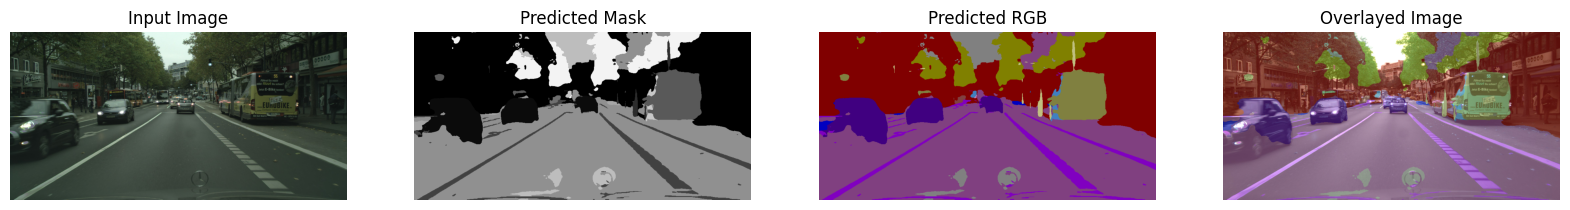

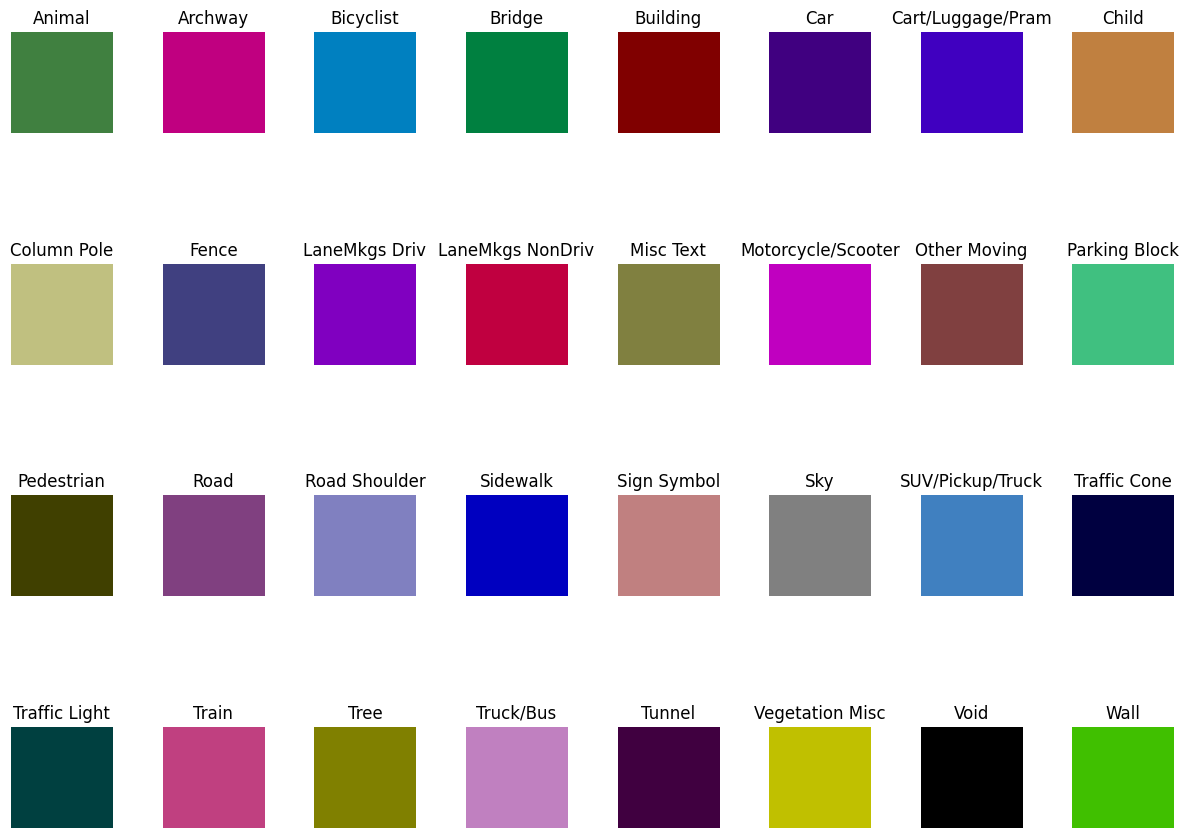

In [22]:
images = r"C:\Users\dhika\Downloads\camvid_images\test_image\test_segment.jpg"
inference_run(images,model_seg)

detected class index: Archway,Building,Car,Column Pole,Fence,LaneMkgs Driv,Misc Text,Other Moving,Parking Block,Pedestrian,Road,Sidewalk,Sign Symbol,Sky,SUV/Pickup/Truck,Traffic Light,Tree,Vegetation Misc,Wall
total subjects detected: 19


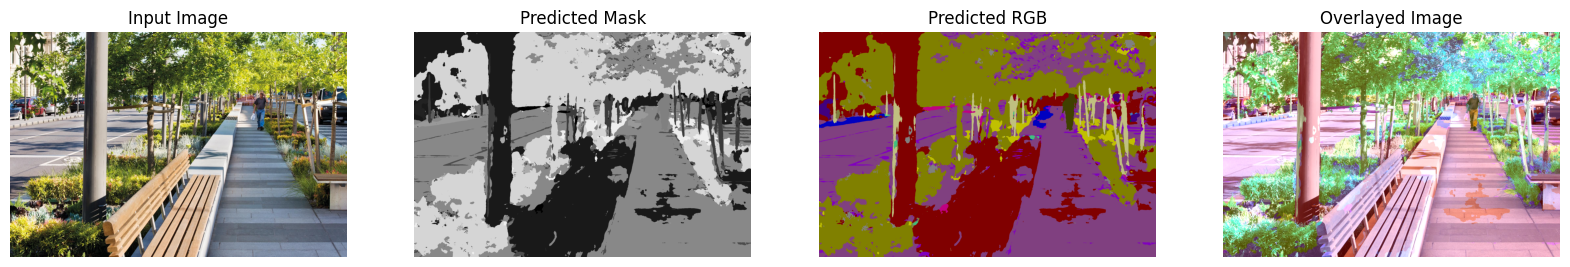

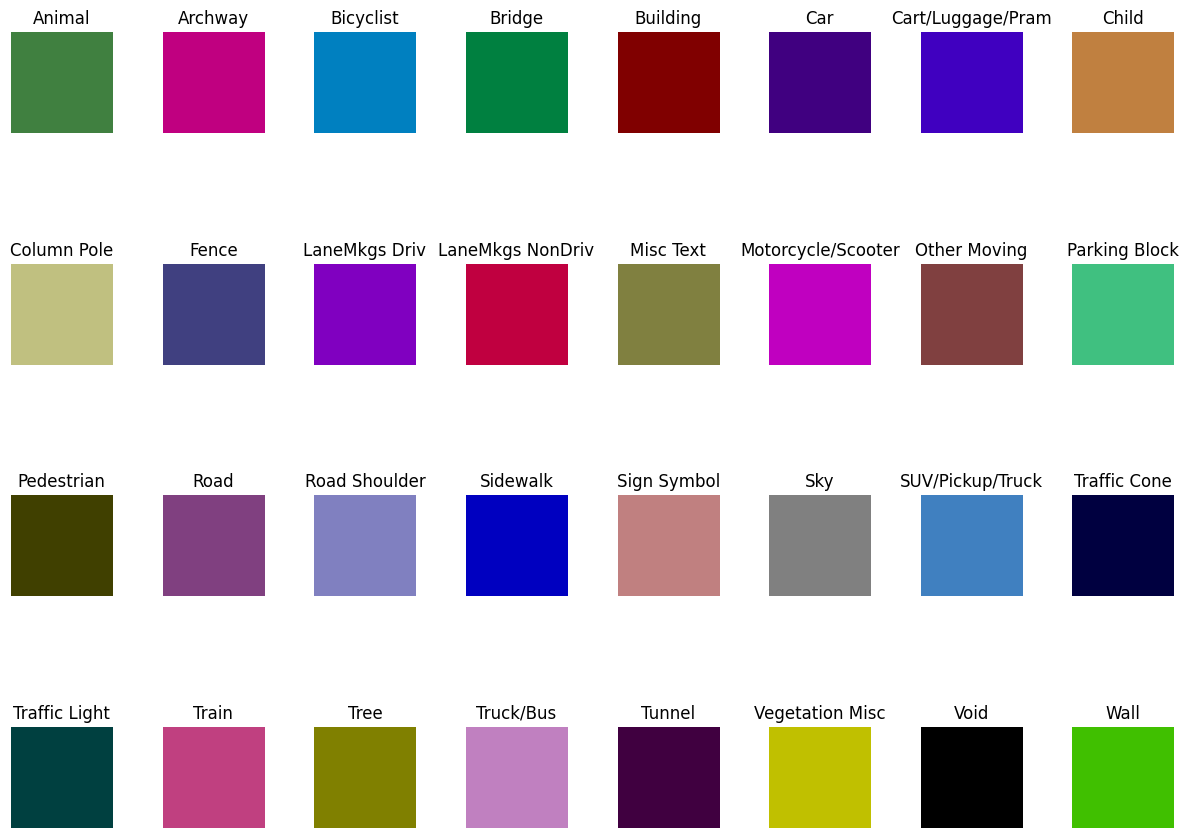

In [24]:
images = r"C:\Users\dhika\Downloads\camvid_images\test_image\test_segment_2.jpg"
inference_run(images,model_seg)